In [26]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
from matplotlib import pyplot as plt
import requests as rq

In [43]:
headers = {
'Accept': 'application/json',
}

uri = 'http://rest.genenames.org'
path = '/fetch/symbol/SYNJ1'

response = rq.get(uri+path, headers=headers)

data = response.json()
print 'Symbol: ' + data['response']['docs'][0]['symbol']
print 'ENSG: ' + data['response']['docs'][0]['ensembl_gene_id']

Symbol: SYNJ1
ENSG: ENSG00000159082


In [2]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
files = os.listdir("data_gtex")

In [4]:
len(files)

53

In [5]:
df = pd.read_csv(("%s/genes.txt"%working_dir), header=[0], index_col=[0])
print(len(df))
df.head()

60483


,type_of_gene
ENSG00000242268,intergenic
ENSG00000270112,unknown
ENSG00000167578,protein-coding
ENSG00000273842,unknown
ENSG00000078237,protein-coding


In [7]:
df=pd.read_csv("genes_hugo_symbol.txt", index_col=[0])
df.set_index('Hugo_Symbol', inplace=True)
maxacceptables = 10
added = 0
for i,cfile in enumerate(files):
    if(re.match("[a-zA-Z0-9\-\.]{1,35}[.gz]",cfile)):
        print(cfile)
        cdf = pd.read_csv(("%s/data_gtex/%s"%(working_dir,cfile)), sep='\t', header=[0], index_col=[0], compression='gzip')
        try:
            df = pd.concat([df,cdf.loc[:,cdf.keys()[1:]]], ignore_index=False, sort=False)
            added=added+1
        except:
            print "Unexpected error:", sys.exc_info()[0]
    if added >= maxacceptables:
        break

print(added)

coad-rsem-fpkm-tcga.txt.gz
prostate-rsem-fpkm-gtex.txt.gz
esophagus_mus-rsem-fpkm-gtex.txt.gz
hnsc-rsem-fpkm-tcga-t.txt.gz
thca-rsem-fpkm-tcga-t.txt.gz
hnsc-rsem-fpkm-tcga.txt.gz
esophagus_gas-rsem-fpkm-gtex.txt.gz
prad-rsem-fpkm-tcga-t.txt.gz
kirp-rsem-fpkm-tcga-t.txt.gz
luad-rsem-fpkm-tcga-t.txt.gz
10


In [23]:
df.fillna(value=0., inplace=True)

211945

In [ ]:
# df = pd.read_csv(("%s/mainTable.csv"%working_dir))

In [7]:
#df.columns=['gene', 'breast', 'kidney', 'bronchus', 'brain']

In [8]:
df.head()

,TCGA-A6-2675-11A-01R-1723-07,TCGA-A6-2685-11A-01R-A32Z-07,TCGA-AZ-6600-11A-01R-1774-07,TCGA-AZ-6598-11A-01R-1774-07,TCGA-AA-3525-11A-01R-A32Z-07,TCGA-AA-3520-11A-01R-A32Z-07,TCGA-A6-5667-11A-01R-1723-07,TCGA-AA-3713-11A-01R-1723-07,TCGA-AA-3514-11A-01R-A32Z-07,TCGA-A6-2686-11A-01R-A32Z-07,...,TCGA-78-7163-01A-12R-2066-07,TCGA-44-5645-01A-01R-A278-07,TCGA-86-7713-01A-11R-2066-07,TCGA-69-7764-01A-11R-2170-07,TCGA-86-7954-01A-11R-2187-07,TCGA-86-8056-01A-11R-2241-07,TCGA-64-5815-01A-01R-1628-07,TCGA-44-3398-01A-01R-1107-07,TCGA-55-6970-01A-11R-1949-07,TCGA-64-1680-01A-02R-0946-07
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
DSCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SYNJ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PTPN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEM1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(("genes:%d\trealizations:%d"%(len(df.index),len(df.keys())-1)))

genes:211945	realizations:2646


In [51]:
df.to_csv(("%s/tcgagtextable.csv"%working_dir))

## Zipf

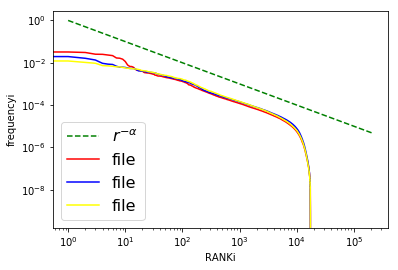

In [52]:
A = [df.loc[:,df.keys()[9]].values, df.loc[:,df.keys()[45]].values, df.loc[:,df.keys()[42]].values]
colors = ['red', 'blue', 'yellow']
fig = plt.figure()
x = np.arange(1, len(A[0]))
plt.ylabel("frequencyi")
plt.xlabel("RANKi")
plt.yscale('log')
plt.xscale('log')
plt.plot(x, 1./x, 'g--', label='$r^{-\\alpha}$')
for i,a in enumerate(A):
    plt.plot(np.sort(a/np.sum(a))[::-1], c=colors[i], label = 'file') 
plt.legend(fontsize=16)
plt.show()